# 도전 과제: 데이터 과학에 관한 텍스트 분석

이 예제에서는 전통적인 데이터 과학 프로세스의 모든 단계를 다루는 간단한 연습을 해보겠습니다. 코드를 작성할 필요는 없으며, 아래 셀을 클릭하여 실행하고 결과를 관찰하기만 하면 됩니다. 도전 과제로, 다른 데이터를 사용하여 이 코드를 시도해보는 것을 권장합니다.

## 목표

이번 강의에서는 데이터 과학과 관련된 다양한 개념에 대해 논의했습니다. 이제 **텍스트 마이닝**을 통해 더 많은 관련 개념을 발견해 봅시다. 데이터 과학에 관한 텍스트를 시작으로 키워드를 추출하고, 결과를 시각화해 보겠습니다.

텍스트로는 Wikipedia의 데이터 과학 페이지를 사용하겠습니다:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## 1단계: 데이터 가져오기

데이터 과학 프로세스의 첫 번째 단계는 데이터를 가져오는 것입니다. 이를 위해 `requests` 라이브러리를 사용할 것입니다:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## 2단계: 데이터 변환

다음 단계는 데이터를 처리하기 적합한 형태로 변환하는 것입니다. 우리의 경우, 페이지에서 HTML 소스 코드를 다운로드했으며 이를 일반 텍스트로 변환해야 합니다.

이를 수행하는 방법은 여러 가지가 있습니다. 우리는 Python의 가장 간단한 내장 [HTMLParser](https://docs.python.org/3/library/html.parser.html) 객체를 사용할 것입니다. `HTMLParser` 클래스를 서브클래싱하고 `<script>` 및 `<style>` 태그를 제외한 HTML 태그 내부의 모든 텍스트를 수집하는 코드를 정의해야 합니다.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## 3단계: 인사이트 얻기

가장 중요한 단계는 데이터를 분석 가능한 형태로 변환하여 인사이트를 도출하는 것입니다. 우리의 경우, 텍스트에서 키워드를 추출하고 어떤 키워드가 더 의미 있는지 확인하고자 합니다.

키워드 추출을 위해 [RAKE](https://github.com/aneesha/RAKE)라는 Python 라이브러리를 사용할 것입니다. 먼저, 이 라이브러리가 설치되어 있지 않다면 설치해 보겠습니다:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


주요 기능은 `Rake` 객체에서 사용할 수 있으며, 일부 매개변수를 사용하여 사용자 정의할 수 있습니다. 우리의 경우, 키워드의 최소 길이를 5자로 설정하고, 문서에서 키워드의 최소 빈도를 3으로 설정하며, 키워드의 최대 단어 수를 2로 설정할 것입니다. 다른 값을 자유롭게 변경하여 결과를 관찰해 보세요.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

우리는 용어 목록과 그에 따른 중요도를 함께 얻었습니다. 보시다시피, 머신 러닝과 빅 데이터와 같은 가장 관련성 높은 분야들이 목록의 상위에 위치해 있습니다.

## 4단계: 결과 시각화

사람들은 데이터를 시각적인 형태로 가장 잘 해석할 수 있습니다. 따라서 통찰을 얻기 위해 데이터를 시각화하는 것이 종종 의미가 있습니다. 우리는 Python의 `matplotlib` 라이브러리를 사용하여 키워드와 그 관련성의 간단한 분포를 그래프로 나타낼 수 있습니다:


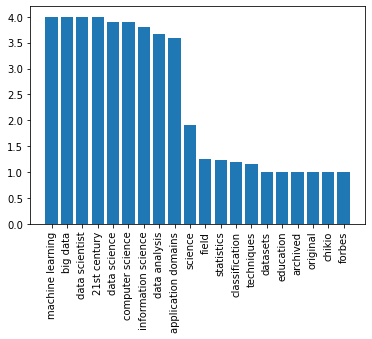

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

단어 빈도를 시각화하는 더 나은 방법이 있습니다. 바로 **워드 클라우드**를 사용하는 것입니다. 키워드 목록에서 워드 클라우드를 그리기 위해 또 다른 라이브러리를 설치해야 합니다.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` 객체는 원본 텍스트 또는 미리 계산된 단어와 빈도 목록을 입력으로 받아들이고, 이미지를 반환하며, 이는 `matplotlib`을 사용하여 표시할 수 있습니다:


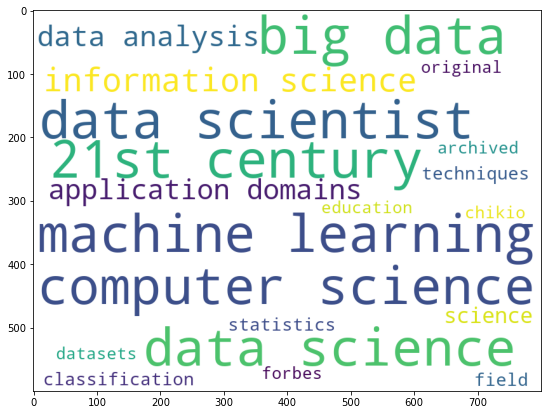

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

우리는 원본 텍스트를 `WordCloud`에 전달할 수도 있습니다 - 비슷한 결과를 얻을 수 있는지 확인해 봅시다:


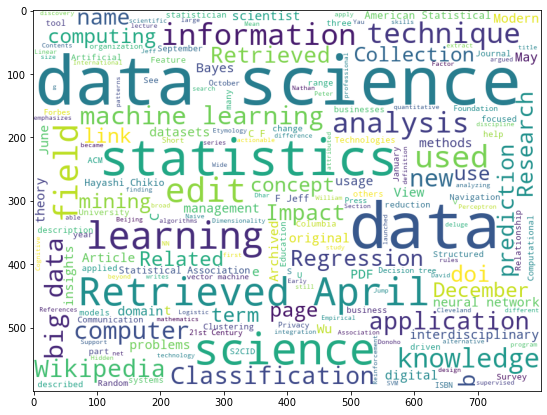

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

이제 워드 클라우드가 더 인상적으로 보이지만, 동시에 많은 잡음(예: `Retrieved on`과 같은 관련 없는 단어들)도 포함되어 있습니다. 또한, *data scientist*나 *computer science*와 같은 두 단어로 이루어진 키워드가 더 적게 추출됩니다. 이는 RAKE 알고리즘이 텍스트에서 좋은 키워드를 선택하는 데 훨씬 더 뛰어난 성능을 보이기 때문입니다. 이 예시는 데이터 전처리와 정리의 중요성을 보여줍니다. 최종적으로 명확한 결과를 얻으면 더 나은 결정을 내릴 수 있기 때문입니다.

이번 연습에서는 Wikipedia 텍스트에서 키워드와 워드 클라우드 형태로 의미를 추출하는 간단한 과정을 살펴보았습니다. 이 예시는 매우 단순하지만, 데이터 과학자가 데이터를 다룰 때 거치는 전형적인 모든 단계를 잘 보여줍니다. 데이터 수집에서부터 시각화에 이르기까지의 과정이 포함됩니다.

우리 강의에서는 이러한 모든 단계를 자세히 다룰 예정입니다.



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있으나, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서를 해당 언어로 작성된 상태에서 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 당사는 책임을 지지 않습니다.  
